In [1]:
import torch
import numpy as np
from torchvision import transforms
from utilits_lib.diffusion_model import diffusion_model

In [2]:
import matplotlib.pyplot as plt
def show_tensor_image(image):
    reverse_transforms = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
        transforms.ToPILImage(),
    ])

    # Take first image of batch
    if len(image.shape) == 4:
        image = image[0, :, :, :]
    plt.imshow(reverse_transforms(image))

In [12]:
IMG_mnist = 32
dm_mnist = diffusion_model(T=500, img_size=IMG_mnist, batch_size=32)
dm_mnist.model = torch.load("./modelSaving/mnist_gen.pt")

In [4]:
IMG_celebA = 64
dm_celebA = diffusion_model(T=300, IMG_SIZE=IMG_celebA, BATCH_SIZE=8)
dm_celebA.model = torch.load("./modelSaving/celebA_gen.pt")

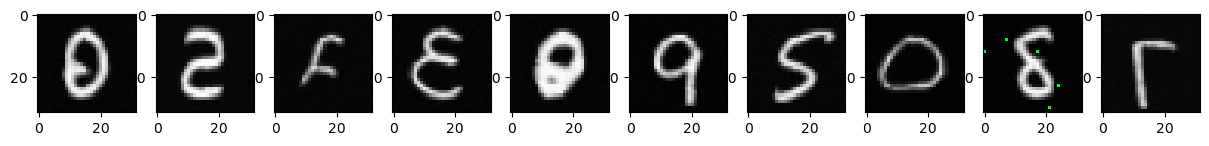

In [13]:
plt.figure(figsize=(15, 15))
for i in range(10):
    img = dm_mnist.generator()
    plt.subplot(1, 10, int(i+1))
    show_tensor_image(img.detach().cpu())
plt.show()

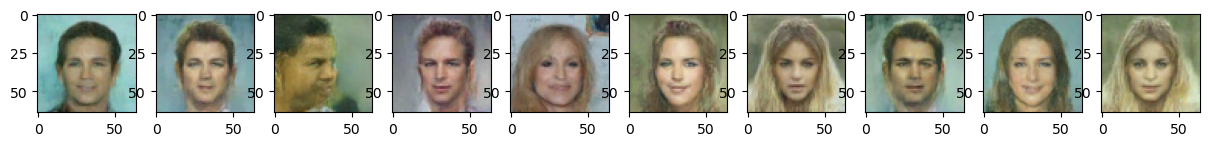

In [6]:
plt.figure(figsize=(15, 15))
for i in range(10):
    img = dm_celebA.generator()
    plt.subplot(1, 10, int(i+1))
    show_tensor_image(img.detach().cpu())
plt.show()